# The K-Nearest Neighbors (KNN)
--------

Import Modules

In [1]:
from Modules   import *
from Functions import *

Reading, cleaning and splitting the data

In [2]:
df = pd.read_csv('../data/breastcancer.csv')
print(f"The shape of the Dataframe is {df.shape}\n {'-- '*50} ")
# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
df = df.astype({'class' : 'category', 'id' : 'category'})             # chaning type to category
df.drop_duplicates(keep = 'first', inplace = True)                    # removing dublicates
df.dropna(how = 'any', inplace = True)                                # dropping NaNs
df.head()

The shape of the Dataframe is (629, 11)
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --  


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1246562,10,2,2,1,2,6.0,1,1,2,1
1,822829,7,6,4,8,10,10.0,9,5,3,1
2,1217264,1,1,1,1,2,1.0,3,1,1,0
3,1296025,4,1,2,1,2,1.0,1,1,1,0
4,1203096,1,1,1,1,1,1.0,3,1,1,0


Checking for features dependency

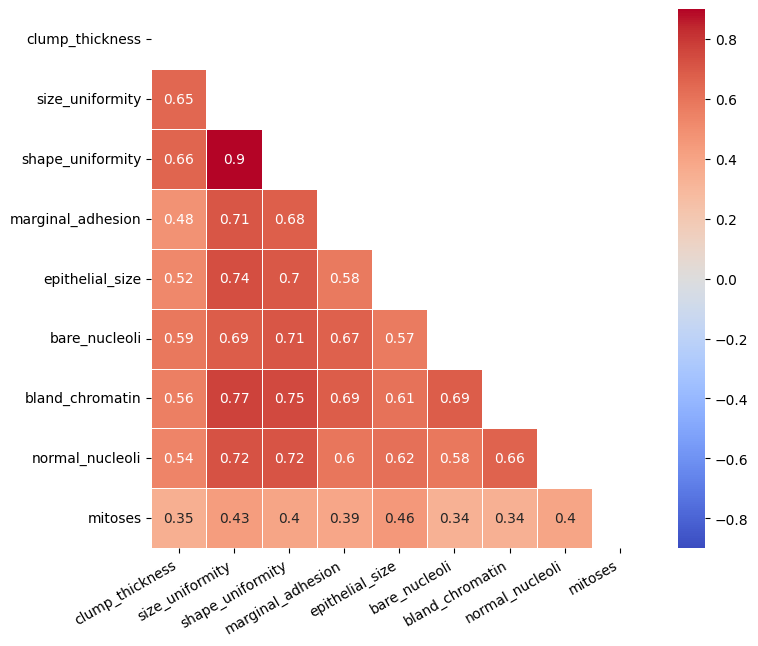

In [3]:
fig, ax = plt.subplots(figsize = [8,7])
corr    = df.corr(numeric_only=True)
matrix  = np.triu(corr)
#--------------------------------------
sns.heatmap(data       = corr, 
            annot      =  True, 
            vmin       = -.9 , 
            vmax       = .9, 
            cmap       = 'coolwarm', 
            mask       = matrix, 
            linewidths = 0.5,
            linecolor  = 'white')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha = 'right');

 #### Defining Features/Target and train_test_split 
Mitoses column seems to have low correlations with other features. The choice here is 'bland_chromatin', which has the lowest correlation with the 'mitoses' column.

In [4]:
 # train_test_split    
df_features = df.loc[:, ['mitoses', 'bland_chromatin']]
df_target   = df.loc[:,  'class']

X_train, X_test, y_train, y_test = train_test_split(df_features,                    
                                                    df_target,
                                                    test_size    = 0.25,
                                                    shuffle      = True,
                                                    random_state = 100
                                                    )
print(f"The shapes of the X_train, and y_train are {X_train.shape, y_train.shape} respectively\n {'-- '*25}")
print(f"The shapes of the X_test, and y_test are   {X_test.shape, y_test.shape} respectively\n {'-- '*25}")

The shapes of the X_train, and y_train are ((456, 2), (456,)) respectively
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
The shapes of the X_test, and y_test are   ((152, 2), (152,)) respectively
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


The Pipeline, hyperparameters space grid

In [5]:
pipeline_knn_base = Pipeline([('std', StandardScaler()), 
                              ('knn', KNeighborsClassifier())
                             ])

k =  list(range(1, 25))
search_space_grid = {
                    'knn__n_neighbors': k, 
                    'knn__weights'    : ['uniform', 'distance']
                    }

grid_search_base = GridSearchCV(estimator   = pipeline_knn_base, 
                                 param_grid = search_space_grid, 
                                 scoring    = 'f1',
                                 cv         = 4,
                                 n_jobs     = -1
                                 )

Fit and Score

In [6]:
# fit grid search on features_train and target_train and print best score and best estimator

grid_search_base.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

KNN Grid best estimator: Pipeline(steps=[('std', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])
KNN Grid best paramters: {'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Scoring of GridSearch KNN
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
Tuned hyperparameters:
 {'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


Model,F1 Score,Recall,Precision,Accuracy
GridSearch KNN,0.876033,0.841270,0.913793,0.901316


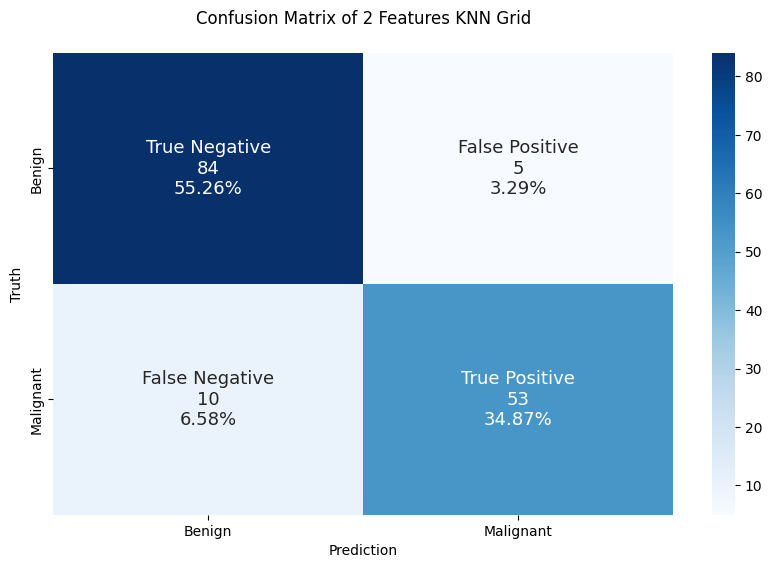

In [7]:

# ----------------------------------------------------------------

y_pred_KNNgrid    = grid_search_base.predict(X_test)
f1_KNNgrid        = f1_score(y_test, y_pred_KNNgrid)
recall_KNNgrid    = recall_score(y_test, y_pred_KNNgrid)
precision_KNNgrid = precision_score(y_test, y_pred_KNNgrid)
accuracy_KNNgrid  = accuracy_score(y_test, y_pred_KNNgrid)


grid_KNN_metrics  = pd.DataFrame({
                                  'Model'    : ['GridSearch KNN'],
                                  'F1 Score' : [f1_KNNgrid],
                                  'Recall'   : [recall_KNNgrid],
                                  'Precision': [precision_KNNgrid],
                                  'Accuracy' : [accuracy_KNNgrid]
                                })
# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

print('KNN Grid best estimator:', grid_search_base.best_estimator_)
print('KNN Grid best paramters:', grid_search_base.best_params_)
print('Scoring of GridSearch KNN')
print('-- '*25)
print('Tuned hyperparameters:\n', grid_search_base.best_params_)
print('-- '*25)
display(grid_KNN_metrics.style.hide())
Confusion_Matrix_Func(y_test, y_pred_KNNgrid, '2 Features KNN Grid');

------------------

### Redefining Features
All features in the data set are considered, PCA will be applied to resolve the high correlation among the features.

In [8]:
 # train_test_split    
df_features = df.drop(['id', 'class'], axis = 1)
df_target   = df['class']

X_train, X_test, y_train, y_test = train_test_split(df_features,                    
                                                    df_target,
                                                    test_size    = 0.25,
                                                    shuffle      = True,
                                                    random_state = 100
                                                    )
print(f"The shapes of the X_train, and y_train are {X_train.shape, y_train.shape} respectively\n {'-- '*25}")
print(f"The shapes of the X_test, and y_test are   {X_test.shape, y_test.shape} respectively\n {'-- '*25}")

The shapes of the X_train, and y_train are ((456, 9), (456,)) respectively
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
The shapes of the X_test, and y_test are   ((152, 9), (152,)) respectively
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


In [9]:

k =  list(range(1, 25))
search_space_grid = {
                    'knn__n_neighbors': k, 
                    'knn__weights'    : ['uniform', 'distance']
                    }
# -------------------------------------------------------------

pipeline_knn_pca = Pipeline([#('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                             ('std' , StandardScaler()), 
                             ('pca' , PCA(n_components = 0.8, random_state = 100)),
                             ('knn' , KNeighborsClassifier()) 
                            ])

GridSearch_KNN = GridSearchCV(estimator  = pipeline_knn_pca, 
                              param_grid = search_space_grid, 
                              scoring    = 'f1',
                              cv         = 4,
                              n_jobs     = -1
                              )

In [10]:
GridSearch_KNN.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('pca',
                                        PCA(n_components=0.8,
                                            random_state=100)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

KNN Grid best estimator: Pipeline(steps=[('std', StandardScaler()),
                ('pca', PCA(n_components=0.8, random_state=100)),
                ('knn', KNeighborsClassifier(n_neighbors=17))])
KNN Grid best paramters: {'knn__n_neighbors': 17, 'knn__weights': 'uniform'}
Scoring of GridSearch PCA-KNN
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
Tuned hyperparameters:
 {'knn__n_neighbors': 17, 'knn__weights': 'uniform'}
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


Model,F1 Score,Recall,Precision,Accuracy
GridSearch PCA-KNN,0.968750,0.984127,0.953846,0.973684


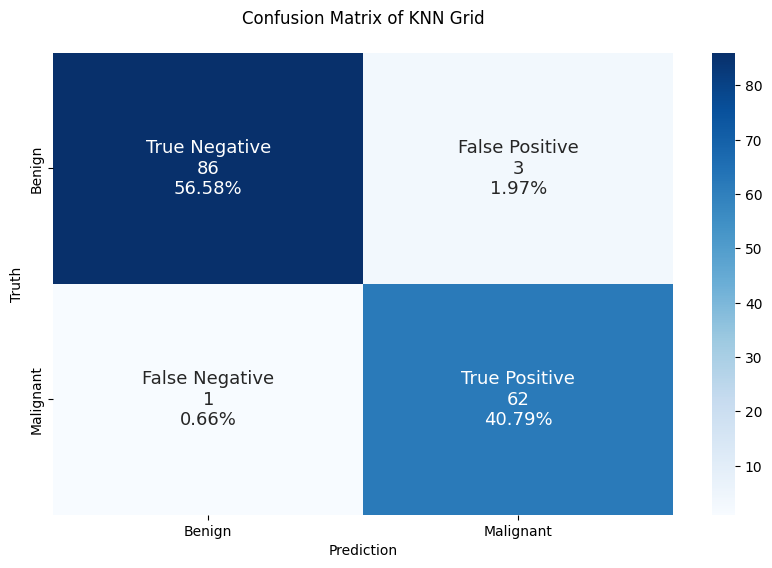

In [11]:
# ----------------------------------------------------------------

y_pred_KNN    = GridSearch_KNN.predict(X_test)
f1_KNN        = f1_score(y_test, y_pred_KNN)
recall_KNN    = recall_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
accuracy_KNN  = accuracy_score(y_test, y_pred_KNN)


grid_KNN_metrics  = pd.DataFrame({
                                  'Model'    : ['GridSearch PCA-KNN'],
                                  'F1 Score' : [f1_KNN],
                                  'Recall'   : [recall_KNN],
                                  'Precision': [precision_KNN],
                                  'Accuracy' : [accuracy_KNN]
                                })
# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

print('KNN Grid best estimator:', GridSearch_KNN.best_estimator_)
print('KNN Grid best paramters:', GridSearch_KNN.best_params_)
print('Scoring of GridSearch PCA-KNN')
print('-- '*25)
print('Tuned hyperparameters:\n', GridSearch_KNN.best_params_)
print('-- '*25)
display(grid_KNN_metrics.style.hide())
Confusion_Matrix_Func(y_test, y_pred_KNN, 'KNN Grid');

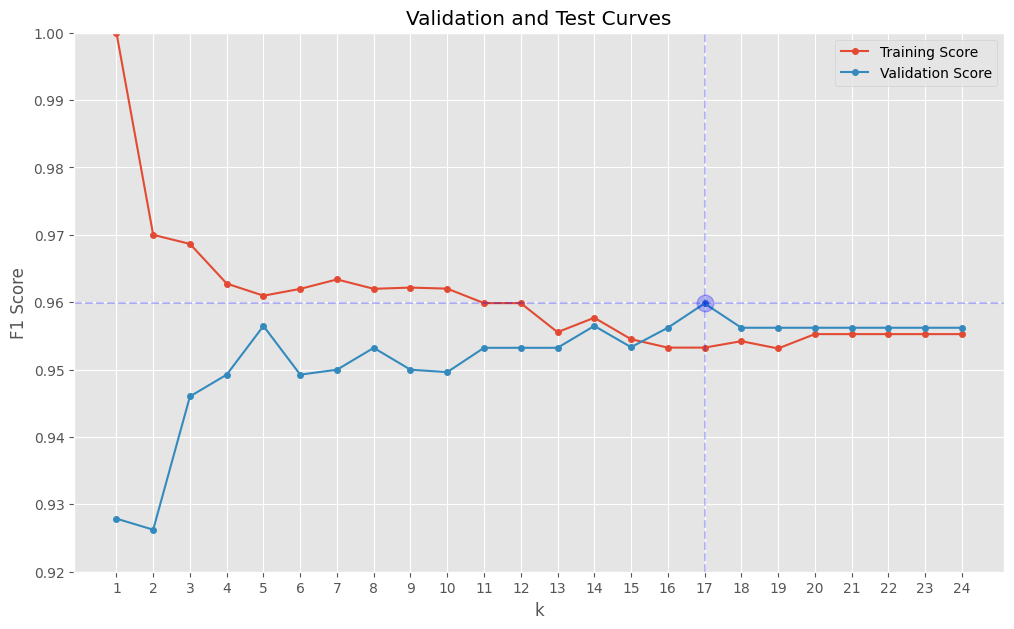

In [12]:

plt.style.use('ggplot')
pipeline_knn_pca.fit(X_train, y_train)                               # The pipeline has not been fitted above, but the gridsearch
# Validation_curve to get training and validation scores
train_scores, valid_scores = validation_curve(estimator   = pipeline_knn_pca,
                                              X           = X_train,
                                              y           = y_train,
                                              param_name  = 'knn__n_neighbors',  
                                              param_range = k,
                                              cv          = 4,
                                              scoring     = 'f1',
                                              n_jobs      = -1
                                             )
# -----------------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize = [12, 7])

train_scores_mean = np.mean(train_scores, axis = 1)       
valid_scores_mean = np.mean(valid_scores, axis = 1)
ax.plot(k,train_scores_mean, label = 'Training Score'  ,  marker = 'o', markersize = 4)
ax.plot(k,valid_scores_mean, label = 'Validation Score',  marker = 'o', markersize = 4)
# -------------------------------------------------------------------------------------0770
best_k = k[np.argmax(np.mean(valid_scores, axis=1))]

plt.axvline(best_k, ls='--', color = 'blue', alpha=0.22)
plt.axhline(np.max(valid_scores_mean), ls='--', color = 'blue',alpha=0.25)
plt.plot(best_k, np.max(valid_scores_mean), 'o', ms=12, alpha = .25, mec='blue', mfc='blue'); 

plt.title('Validation and Test Curves')
plt.xlabel('k')
plt.xticks(k, labels=[f'{value}' for value in k])
plt.ylim(0.92, 1.0) 
plt.ylabel('F1 Score')
plt.legend();



----------------------------------------------------------------

Experiments and Plots

In [168]:
pipeline_knn_pca = Pipeline([
                            #('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                             ('std' , StandardScaler()), 
                             ('pca' , PCA(n_components = 4, random_state = 100)),
                             ('knn' , KNeighborsClassifier(n_neighbors = GridSearch_KNN.best_params_['knn__n_neighbors'],
                                                           weights     = GridSearch_KNN.best_params_['knn__weights']))
                            ])

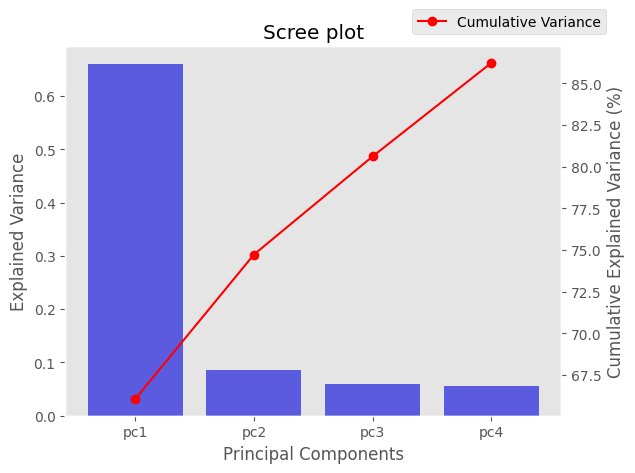

In [169]:

pipeline_knn_pca.fit(X_train, y_train)                                       # fitting of the pieline and not the gridsearch

pca      = pipeline_knn_pca.named_steps['pca']
pc_names = ['pc{}'.format(i+1) for i in range(pca.n_components)]


fig, ax = plt.subplots()
ax2     = ax.twinx()

# Plot explained variance on the first y-axis
sns.barplot(x = pc_names, 
            y = pca.explained_variance_ratio_, 
            ax=ax, color='blue', alpha=0.7)

ax.set(title  = "Scree plot", 
       ylabel = "Explained Variance", 
       xlabel = "Principal Components")


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)                             # Cumulative explained variance

ax2.plot(pc_names, cumulative_variance * 100, 
         color='red', marker='o', label='Cumulative Variance')
ax2.set_ylabel("Cumulative Explained Variance (%)")
ax2.legend(loc='upper left', bbox_to_anchor=(0.7, 1.1), borderaxespad=0.)

ax.grid(False)
ax2.grid(False)

------------

### Introduction of PolynomialFeatures

In [170]:
# Introduction of PolynomialFeatures
pipeline_knn_poly_pca = Pipeline([
                                 ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                                 ('std' , StandardScaler()), 
                                 ('pca' , PCA(n_components = 4, random_state = 100)),
                                 ('knn' , KNeighborsClassifier(n_neighbors = GridSearch_KNN.best_params_['knn__n_neighbors'],
                                                               weights     = GridSearch_KNN.best_params_['knn__weights']))
                                  ])

#fitting the pipeline
pipeline_knn_poly_pca.fit(X_train, y_train)   

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('std', StandardScaler()),
                ('pca', PCA(n_components=4, random_state=100)),
                ('knn', KNeighborsClassifier(n_neighbors=17))])

In [171]:
pca      = pipeline_knn_poly_pca.named_steps['pca']                      # Redefining pca with the new poly pipeline

poly = pipeline_knn_poly_pca.named_steps['poly']
poly_features_names = poly.get_feature_names_out(input_features =X_train.columns)


In [172]:

# Define the Eigenvectors Matrix
eigenvectors         = pd.DataFrame(pca.components_, index=pc_names)
eigenvectors.columns = poly_features_names
eigenvectors.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,clump_thickness^2,...,bare_nucleoli^2,bare_nucleoli bland_chromatin,bare_nucleoli normal_nucleoli,bare_nucleoli mitoses,bland_chromatin^2,bland_chromatin normal_nucleoli,bland_chromatin mitoses,normal_nucleoli^2,normal_nucleoli mitoses,mitoses^2
pc1,0.116299,0.151314,0.150789,0.136268,0.132610,0.126163,0.138348,0.138231,0.101545,0.117379,...,0.123137,0.136939,0.136993,0.120082,0.137167,0.144126,0.121687,0.134364,0.123101,0.088555
pc2,-0.043400,-0.062895,-0.082954,-0.067829,0.009711,-0.131741,-0.100007,-0.002384,0.331712,-0.037895,...,-0.136927,-0.140858,-0.054507,0.203377,-0.096926,-0.029088,0.250586,0.006157,0.285716,0.353981
pc3,0.090354,0.095757,0.073245,-0.212214,0.163127,-0.220463,-0.018919,0.141089,-0.083131,0.096641,...,-0.245236,-0.189126,-0.080403,-0.212784,-0.019590,0.086674,-0.092458,0.162726,-0.007785,-0.075142
pc4,0.347778,-0.014498,0.027468,-0.160355,-0.008426,0.205025,-0.030139,-0.061771,0.058297,0.368422,...,0.199610,0.084428,0.020089,0.125730,-0.074956,-0.124373,-0.020870,-0.091049,-0.008113,0.058356


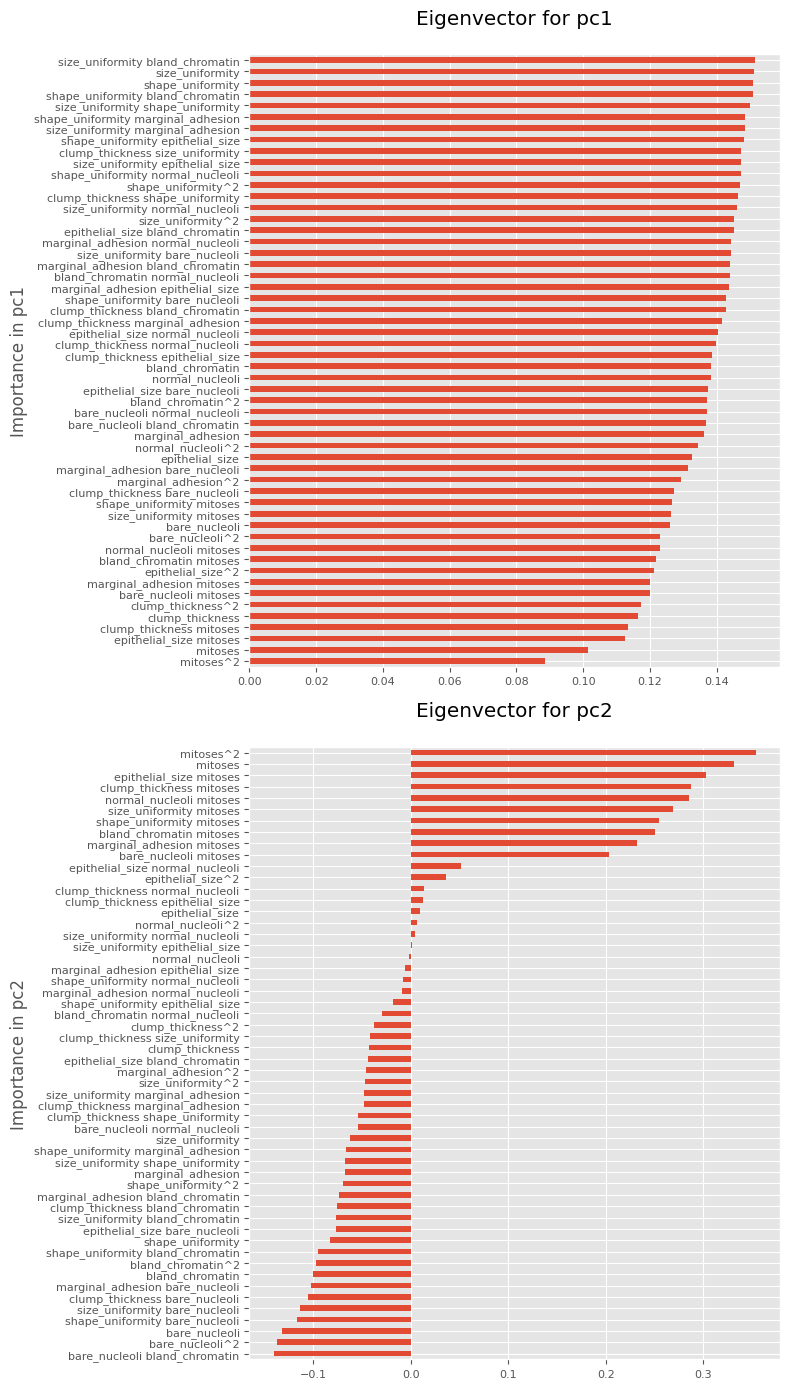

In [179]:
fig, ax = plt.subplots(2,1,figsize = [8, 14])

eigenvectors.iloc[0,:].sort_values(ascending = True).plot.barh(ax= ax[0])
ax[0].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='x', labelsize=8)
ax[0].set(title  = "Eigenvector for pc1\n", ylabel = "Importance in pc1")

eigenvectors.iloc[1,:].sort_values(ascending = True).plot.barh(ax= ax[1])
ax[1].tick_params(axis='y', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)
ax[1].set(title  = "Eigenvector for pc2\n", ylabel = "Importance in pc2")
plt.tight_layout();

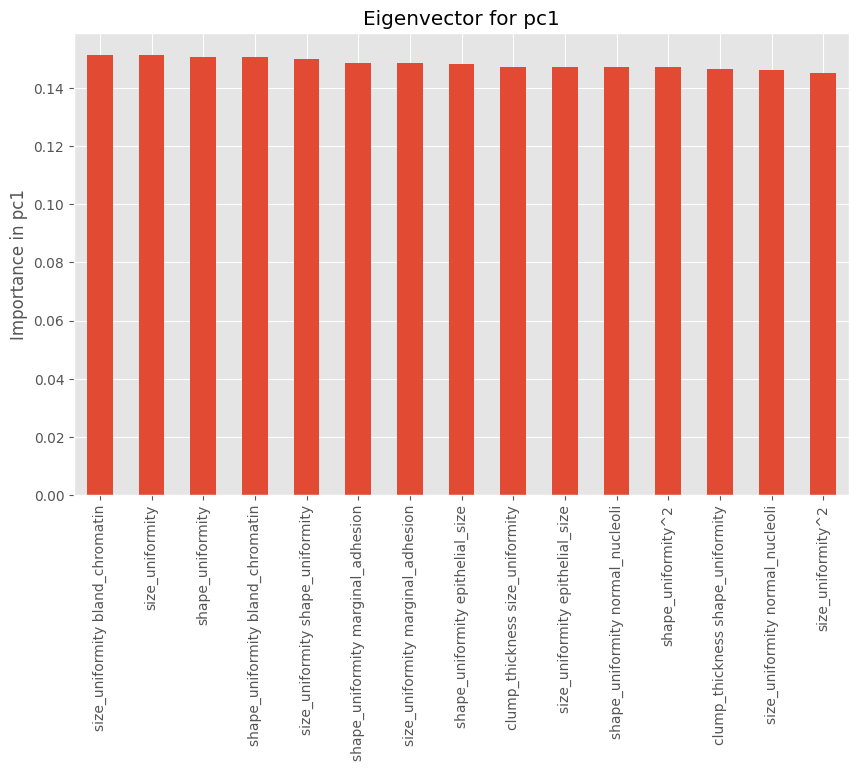

In [174]:
fig, ax = plt.subplots(figsize = [10,6])
#plt.figure(figsize=(15,5))

# import matplotlib.patches as patches
# rect = patches.Rectangle((-0.4, 0.001), 2.9, .16, linewidth=2, edgecolor='blue', facecolor='none')
# ax.add_patch(rect)

abs(eigenvectors.iloc[0,:]).sort_values(ascending = False).head(15).plot.bar(ax= ax)
ax.set(title  = "Eigenvector for pc1", 
       ylabel = "Importance in pc1");

-------------------

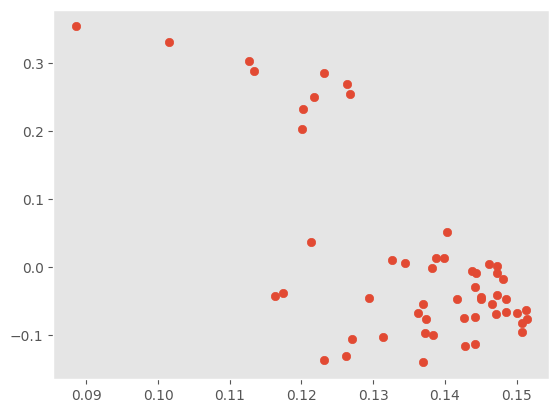

In [176]:
plt.scatter(eigenvectors.loc['pc1',:],eigenvectors.loc['pc2',:])
plt.grid(False);